## Transfer function of a position sensor.

Andrés Marrugo, PhD -- Universidad Tecnológica de Bolívar.

The transfer function of a small position sensor is evaluated experimentally. The sensor is made of a very small magnet and the position with respect to the centerline (see Figure 2.24) is sensed by the horizontal, restoring force on the magnet. The magnet is held at a fixed distance, $h$, from the iron plate. The measurements are given in the table below.

|                      	|    	|       	|       	|       	|       	|       	|       	|       	|
|----------------------	|----	|-------	|-------	|-------	|-------	|-------	|-------	|-------	|
| Displacement, d [mm] 	| 0  	| 0.08  	| 0.16  	| 0.24  	| 0.32  	| 0.4   	| 0.48  	| 0.52  	|
| Force [mN]           	|  0 	| 0.576 	| 1.147 	| 1.677 	| 2.187 	| 2.648 	| 3.089 	| 3.295 	|
|                      	|    	|       	|       	|       	|       	|       	|       	|       	|

![A simple position sensor.](../images/simple-position-sensor.png "A simple position sensor.")
**Fig. 2.24 A simple position sensor.**

1. Find the linear transfer function that best fits these data.    
2. Find a transfer function in the form of a second-order polynomial ($y = a+bf+cf^2$), where $y$ is the displacement and $f$ is the restoring force by evaluating the constants $a$, $b$, and $c$.    
3. Plot the original data together with the transfer functions in (1) and (2) and discuss the errors in the choice of approximation.    

### Solution

Let's begin by plotting the data.

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


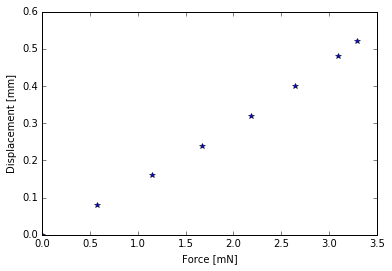

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d = np.array([0,0.08,0.16,0.24,0.32,0.4,0.48,0.52])
f = np.array([0,0.576,1.147,1.677,2.187,2.648,3.089,3.295])

plt.plot(f,d,'*')
plt.ylabel('Displacement [mm]')
plt.xlabel('Force [mN]')
plt.show()


We can see that the data is approximately linear, but not quite.

The linear transfer fuction that best fits the data is found by performing a linear fit in the least squares sense. If we go back to the book and review how to carry out linear approximation of nonlinear transfer functions.

In [4]:
from IPython.display import IFrame
IFrame('../pdfs/linear-approximation.pdf',
       width='100%', height=400)

We see that we need to fit the data to a line with equation $d=af+b$, and we need to compute the coefficients $a$ and $b$ that provides a best fit in the least squares sense.

To do this in python we use the [polyfit][poly_link] function.

[poly_link]: http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html "numpy.polyfit — NumPy v1.9 Manual"

The coefficients are a = 0.157661058706 b = -0.0131058771534


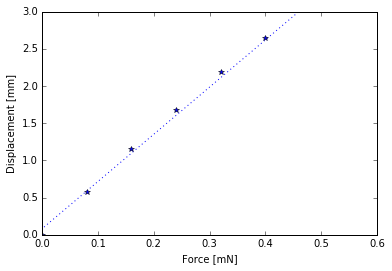

In [3]:
# polyfit computes the coefficients a and b of degree=1
a,b = np.polyfit(f,d,1)

print 'The coefficients are a =',a,'b =',b

d1 = a*f+b
plt.plot(d1,f,':b',label='Fitted line')
plt.plot(d,f,'*')
plt.ylabel('Displacement [mm]')
plt.xlabel('Force [mN]')
plt.axis([0,0.6,0,3])
plt.show()

We have obtained the linear fit to the data. Several points are not exactly on the line, therefore there's always an error with respect to the ideal transfer function. Probably a second order fit might be better.

For the transfer function in (2), $y = a+bf+cf^2$, we have to find $a$, $b$, and $c$.

In [5]:
# polyfit computes the coefficients a and b of degree=1
c2,b2,a2 = np.polyfit(f,d,2)

print 'The coefficients are a =',a2,'b =',b2,'c =',c2

The coefficients are a = 0.00187368040221 b = 0.126233269703 c = 0.00926531112283


Now we plot both transfer functions.

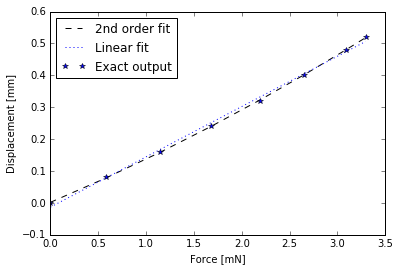

In [9]:
d2 = a2+b2*f+c2*f**2
tf2=plt.plot(f,d2,'--k',label='2nd order fit')
tf1=plt.plot(f,d1,':b',label='Linear fit')
tf0=plt.plot(f,d,'*',label='Exact output')
plt.ylabel('Displacement [mm]')
plt.xlabel('Force [mN]')
plt.legend(loc='upper left')
plt.show()

Now let's compute the errors.

In [15]:
# Linear fit error
error1 = np.sum(np.abs(d - d1))/len(d)
error1_max = np.max(np.abs(d - d1))
print 'Mean error linear fit: ', error1
print 'Max error linear fit: ', error1_max

# Error fitting to a second order degree polynomial
error2 = np.sum(np.abs(d - d2))/len(d)
error2_max = np.max(np.abs(d - d2))
print 'Mean error 2nd order fit: ',error2
print 'Max error 2nd order fit: ',error2_max

 Mean error linear fit:  0.00877563500446
Max error linear fit:  0.0136126887162
Mean error 2nd order fit:  0.00136479637705
Max error 2nd order fit:  0.00234194838585


Owing to the nonlinearity of the data, the average and maximum errors are lower for a second degree polynomial fit (error 2). However, the error for a linear fit can be considered acceptable, while maintaining a simple and linear transfer function.

> This page was written in the [IPython Notebook](http://ipython.org/notebook.html). To download the notebook click on this option at the top menu or get it from the [github repo](https://github.com/agmarrugo/sensors-actuators).